Importation des **bibliothéques**

In [269]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score

 Charger le jeu de donnée hotel_bookings.csv

Assemblage Google Drive dans Colaboratory

In [271]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [306]:
df=pd.read_csv("/content/drive/MyDrive /hotel_bookings.csv",)
df1=df.head(6)
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Nettoyage/prétraitement des données


Déterminer le nombre de valeurs manquantes pour chaque attribut






In [307]:
df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [308]:
print("Les colonnes suivantes contiennent des valeurs manquantes :")
print(df.columns[df.isna().any()].unique())
len(df.columns[df.isna().any()].unique())

Les colonnes suivantes contiennent des valeurs manquantes :
Index(['children', 'country', 'agent', 'company'], dtype='object')


4

Représenter les valeurs manquantes par un heatmap (utiliser la fonction heatmap
de la bibliothèque seaborn

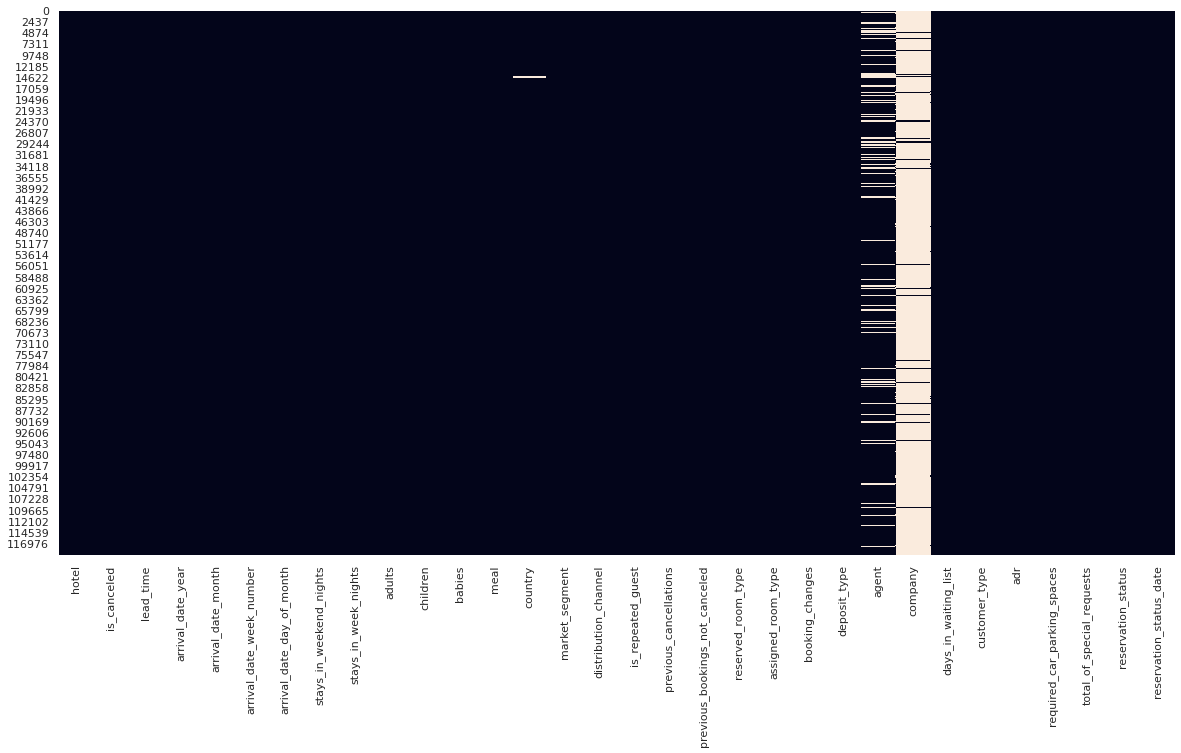

In [329]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

Nous avons remarqué qu'il ya 4 paramètres ont des valeurs manquantes. Examinons maintenant plus en détail ces quatre colonnes et voyons combien de valeurs sont manquées.


In [275]:
print("Nombre de valeurs vides dans la colonne enfants : ", df['children'].isnull().sum())
print("Percentage： ", df['children'].isnull().sum() / df.shape[0] * 100)

Nombre de valeurs vides dans la colonne enfants :  4
Percentage：  0.003350364352123293


In [318]:
print("Nombre de valeurs vides dans la colonne company ", df['country'].isnull().sum())
print("Pourcentage ", df['country'].isnull().sum() / df.shape[0] * 100)

Nombre de valeurs vides dans la colonne company  488
Pourcentage  0.40874445095904177


In [277]:
print("Nombre de valeurs vides dans la colonne agent : ", df['agent'].isnull().sum())
print("Pourcentage ", df['agent'].isnull().sum() / df.shape[0] * 100)

Nombre de valeurs vides dans la colonne agent :  16340
Pourcentage  13.686238378423655


In [278]:
print("Nombre de valeurs vides dans la colonne company : ", df['company'].isnull().sum())
print("Pourcentage ", df['company'].isnull().sum() / df.shape[0] * 100)

Nombre de valeurs vides dans la colonne company :  112593
Pourcentage  94.30689337465449


Ainsi, à partir de ce qui précède, nous pouvons voir le nombre exact de lignes avec des valeurs manquantes dans chaque colonne, et il est démontré que la colonne **company** contient essentiellement 94,3 % de valeurs manquantes ! Cela signifie essentiellement que nous ne devons pas utiliser la colonne **company** pour une analyse plus approfondie des données car il y a trop de valeurs manquantes. Laissons supprimer cette colonne.


Supprimer la colonne **company** car il y a trop de valeurs nulles

In [279]:
df.drop(['company'], axis=1, inplace=True)

Supprimez les lignes contenant des données **country** manquantes. Nous ne voulons pas supprimer toute la colonne car il n'y a pas beaucoup de valeurs nulles et c'est une variable importante.

In [280]:
df.dropna(subset=['country'],inplace=True)

Similaire à la cellule précédente


In [281]:
df.dropna(subset=['country'],inplace=True)
df.dropna(subset=['children'],inplace=True)

Il n'y a pas une tonne de valeurs nulles pour l'**agent** mais nous pouvons le supprimer car nous n'utiliserons de toute façon pas cette variable dans l'analyse.

In [282]:
df.drop(['agent'], axis=1, inplace=True)


Déterminer le nombre de valeurs manquantes pour chaque attribut

In [283]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Vérifier les données en double (**Duplicate Data**)

In [284]:
df.duplicated().sum()

31984

Supprimer les doublons (Drop Duplciates)

In [285]:
df.drop_duplicates(keep = 'first', inplace = True)

In [286]:
df.duplicated().sum()

0

Vérifier et modifier les types de données

In [287]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

Changer la colonne **children** en int

In [288]:
df['children']=df['children'].astype('int64')

**Ajouter des colonnes utiles **

Ajouter une colonne de taille totale de la famille et une colonne de séjour total

In [289]:
df['total_family_size']=df['adults']+df['children']+df['babies']
df['total_stay']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
df.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_family_size,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03,2,2


Analyse exploratoire


Mois les plus occupés par type d'hôtel


Text(0.5, 1.0, "Mois les plus occupés par type d'hôtel")

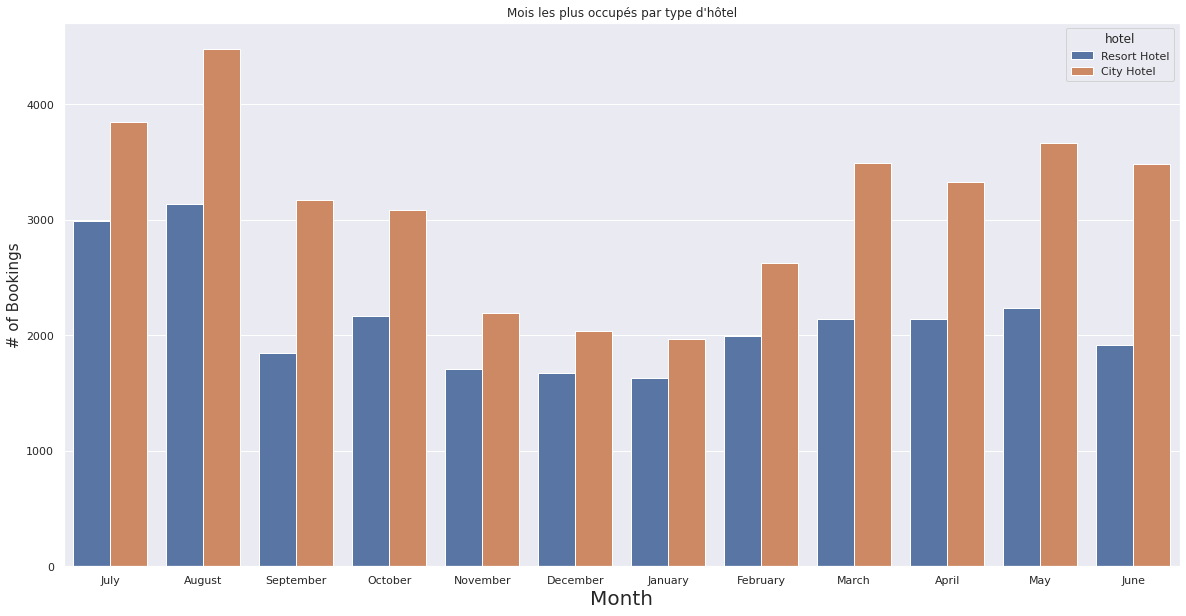

In [291]:
sns.countplot(x ='arrival_date_month',hue='hotel', data = df[(df['is_canceled'] == 0)])
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Month', fontsize=20)
plt.ylabel('# of Bookings', fontsize=15)
plt.title("Mois les plus occupés par type d'hôtel")

Insights: Les deux hôtels suivent un modèle similaire d'être plus occupés pendant les mois d'été. De plus, l'hôtel de ville est plus fréquenté que l'hôtel de villégiature.

**Colonne : Hotel**


De cette colonne, nous pouvons voir que plus de personnes (presque le double) préfèrent réserver un hôtel en ville (**a city hotel**). Cela peut être intuitif car un hôtel de ville **( a city hotel )** est généralement moins cher qu'un hôtel de villégiature **(resort hotel )** .

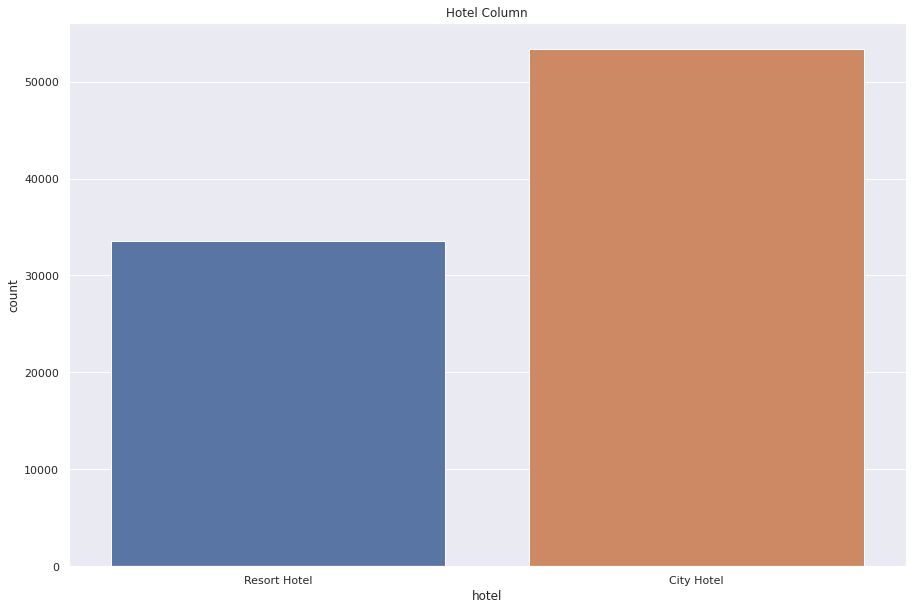

Percentages: 
City Hotel      61.444646
Resort Hotel    38.555354
Name: hotel, dtype: float64


In [205]:
plt.figure(figsize=(15, 10))
plt.title("Hotel Column")
sns.countplot(x=df['hotel'])
plt.show()

print("Percentages: ")
print(df['hotel'].value_counts() / df.shape[0] * 100)

**Colonne : is_canceled**

Dans cette colonne, nous pouvons voir que plus de personnes (presque le double) ont tendance à ne pas annuler leurs réservations.

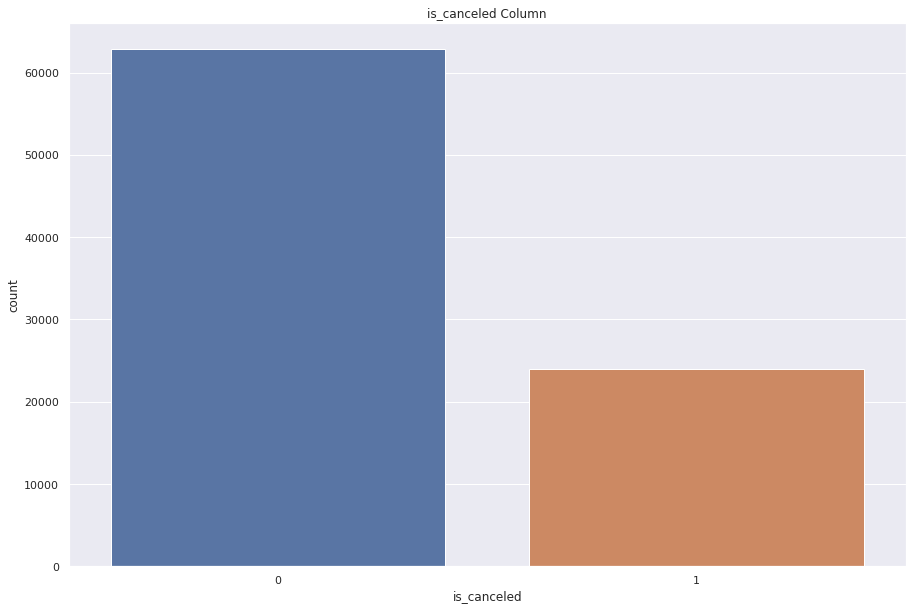

Percentages: 
0    72.406057
1    27.593943
Name: is_canceled, dtype: float64


In [206]:
plt.figure(figsize=(15, 10))
plt.title("is_canceled Column")
sns.countplot(x=df['is_canceled'])
plt.show()

print("Percentages: ")
print(df['is_canceled'].value_counts() / df.shape[0] * 100)

Origines des clients les plus fréquentes (Most Frequent origins of customers)

''

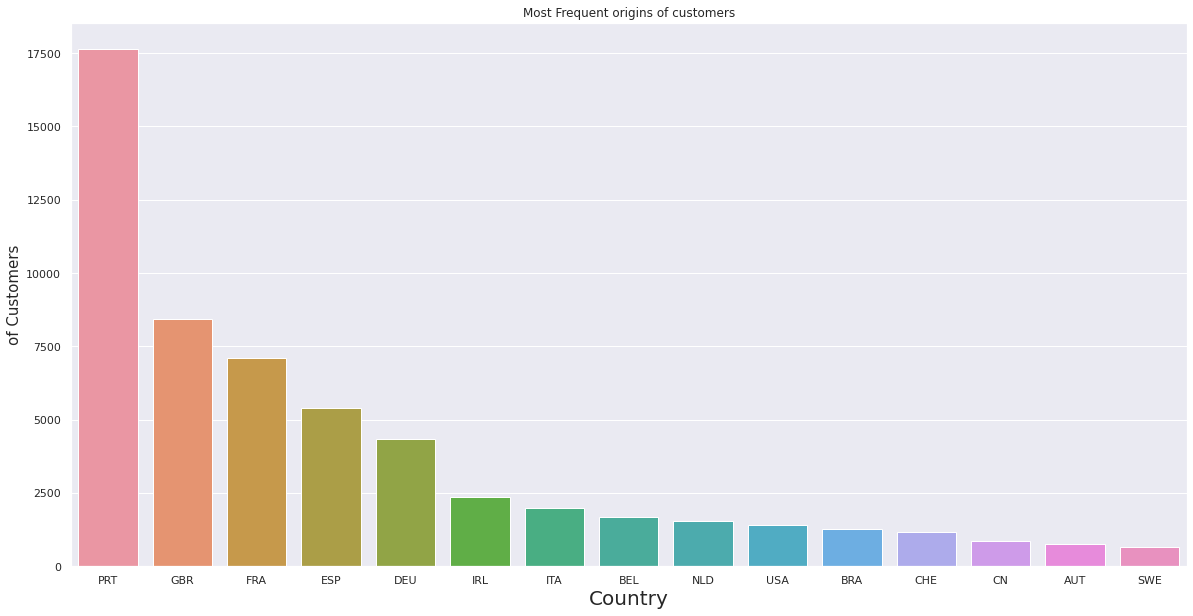

In [207]:
#top 10 countries

top_countries = df[(df['is_canceled'] == 0)]['country'].value_counts().reset_index()
top_countries.columns =['Country','Customer_Count']
top_countries = top_countries[:15]
top_countries
sns.barplot( data=top_countries, x=top_countries.Country, y=top_countries.Customer_Count) 
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Country', fontsize=20)
plt.ylabel('of Customers', fontsize=15)
plt.title("Most Frequent origins of customers")


Insight: Les deux hôtels sont au Portugal, raison pour laquelle la majorité de leurs clients viennent du Portugal.


In [208]:
top_countries

,Country,Customer_Count
0,PRT,17653
1,GBR,8446
2,FRA,7104
3,ESP,5388
4,DEU,4332
5,IRL,2348
6,ITA,1990
7,BEL,1670
8,NLD,1561
9,USA,1416


Origines les plus fréquentes des clients par hôtel ( Most Frequent origins of customers by hotel)

In [209]:
#créer temp df pour les clients qui n'ont pas annulé
temp = df[(df['is_canceled']==0)]

In [210]:
#Créer une liste des 15 premiers pays pour plus de simplicité
top_countries_list=top_countries.Country.unique()
top_countries_list

array(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'IRL', 'ITA', 'BEL', 'NLD',
       'USA', 'BRA', 'CHE', 'CN', 'AUT', 'SWE'], dtype=object)

In [211]:
#Ce df ne contient que les valeurs de pays qui se trouvent dans la top_countries_list
Origins_by_HotelType = temp[temp['country'].isin(top_countries_list)]

Text(0.5, 1.0, 'Most Frequent origins of customers by hotel')

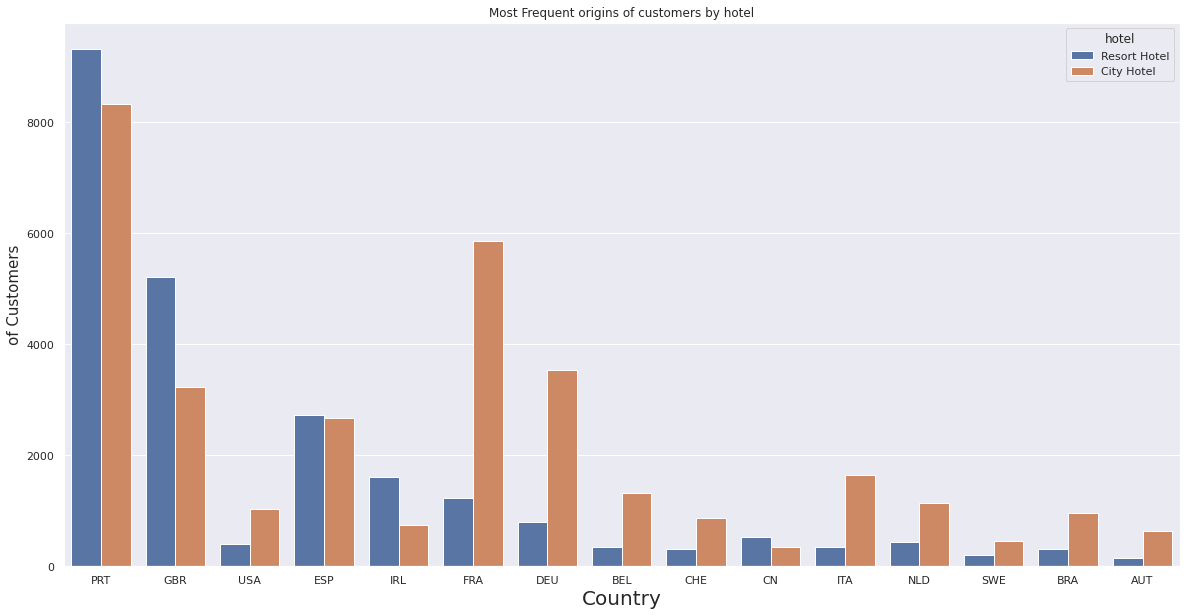

In [212]:
sns.countplot(x ='country',hue='hotel', data = Origins_by_HotelType)
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Country', fontsize=20)
plt.ylabel('of Customers', fontsize=15)
plt.title("Most Frequent origins of customers by hotel")

Insight : Une bonne partie de la clientèle de l'hôtel de ville **(the city hotel's customers )** vient de France et d'Allemagne, contrairement à l'hôtel de villégiature **(the Resort hotel)**. Cela pourrait être dû au fait que l'hôtel de ville **(the city hotel)** est probablement utilisé pour les voyageurs d'affaires.

Comparaison de base entre **City** and **Resort** Hotels

Tarif journalier moyen


In [213]:
df[(df['is_canceled']==0)].groupby('hotel')['adr'].describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,37365.0,108.287217,42.612880,0.00,80.75,102.0,130.5,510.0
Resort Hotel,25566.0,93.508042,60.819528,-6.38,49.00,75.0,123.5,508.0


Insight : les clients des hôtels de la ville **( City Hotel )**  paient en moyenne un tarif journalier légèrement plus élevé.

Séjour total


In [214]:
df[(df['is_canceled']==0)].groupby('hotel')['total_stay'].describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,37365.0,2.991757,1.860539,0.0,2.0,3.0,4.0,57.0
Resort Hotel,25566.0,4.228546,3.403255,0.0,2.0,3.0,7.0,56.0


Insight : Il est courant que les clients séjournent plus longtemps à l'hôtel de villégiature **(Resort Hotel)**, en moyenne. C'est probablement parce que l'hôtel de villégiature **(Resort Hotel)** est généralement utilisé pour les vacances, en spéculation.

Taille de la famille


In [215]:
df[(df['is_canceled']==0)].groupby('hotel')['total_family_size'].describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,37365.0,1.976582,0.705980,0.0,2.0,2.0,2.0,12.0
Resort Hotel,25566.0,1.985606,0.675887,0.0,2.0,2.0,2.0,5.0


Inisght : Aucune différence de taille de famille par réservation entre les hôtels.

Chambres populaires par hôtel (nombre de séjours)


In [216]:
popular_rooms=df[(df['is_canceled']==0)].groupby(['reserved_room_type','hotel']).size().unstack()
popular_rooms

hotel,City Hotel,Resort Hotel
reserved_room_type,,
A,27134.0,14371.0
B,678.0,3.0
C,9.0,609.0
D,7088.0,5047.0
E,1013.0,3353.0
F,1079.0,886.0
G,364.0,940.0
H,NaN,353.0
L,NaN,4.0


Insight :La chambre A était la plus populaire pour les deux hôtels, tandis que chaque hôtel avait différentes chambres impopulaires. Ces données pourraient également être attribuées au nombre de chambres par type et à la disponibilité.


Text(0.5, 1.0, 'Popular Rooms by Hotel(Number of stays)')

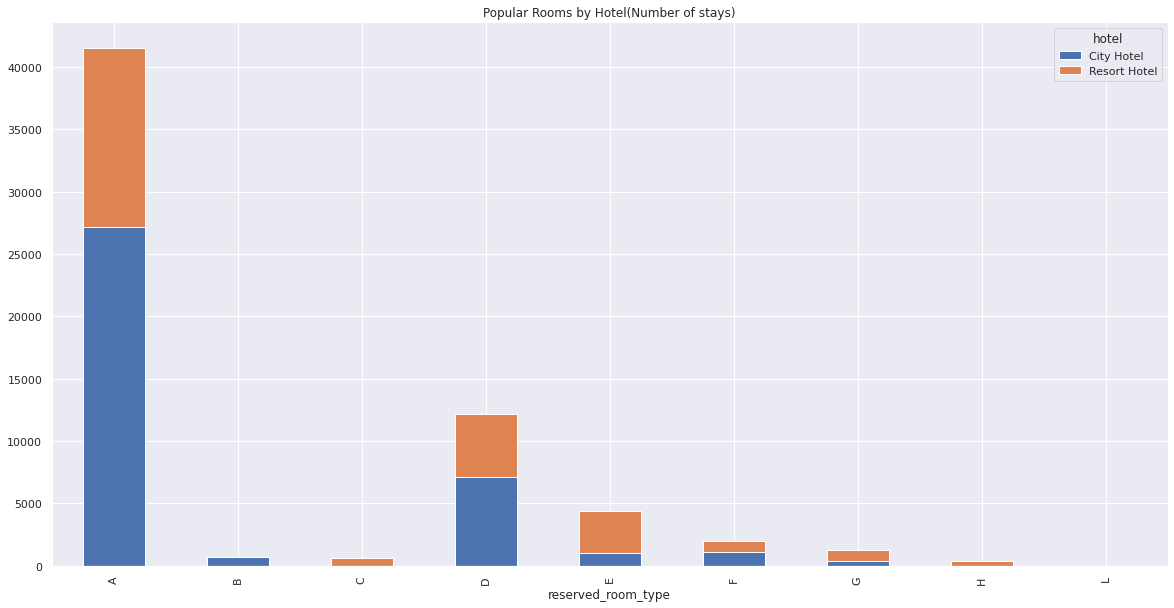

In [217]:
popular_rooms.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title("Popular Rooms by Hotel(Number of stays)")

Insight : Demande de chambres similaire entre les hôtels

Les chambres les plus chères de chaque hôtel


In [218]:
Average_Room_Prices=df[(df['is_canceled']==0)].groupby(['reserved_room_type','hotel'])['adr'].mean().unstack()
Average_Room_Prices

hotel,City Hotel,Resort Hotel
reserved_room_type,,
A,97.576187,75.448693
B,87.501711,104.666667
C,68.111111,154.899934
D,128.774721,101.286729
E,153.648618,110.077304
F,184.886580,130.060621
G,194.193791,161.174021
H,NaN,181.531898
L,NaN,151.000000


Insight : D'après les données, la chambre A est la moins chère des deux hôtels, ce qui explique probablement pourquoi elle est la plus populaire. Alors que les chambres comme G et F sont plus chères, ce qui explique probablement pourquoi elles sont logées à moins de A.

Text(0.5, 1.0, 'Most expensive rooms at each hotel')

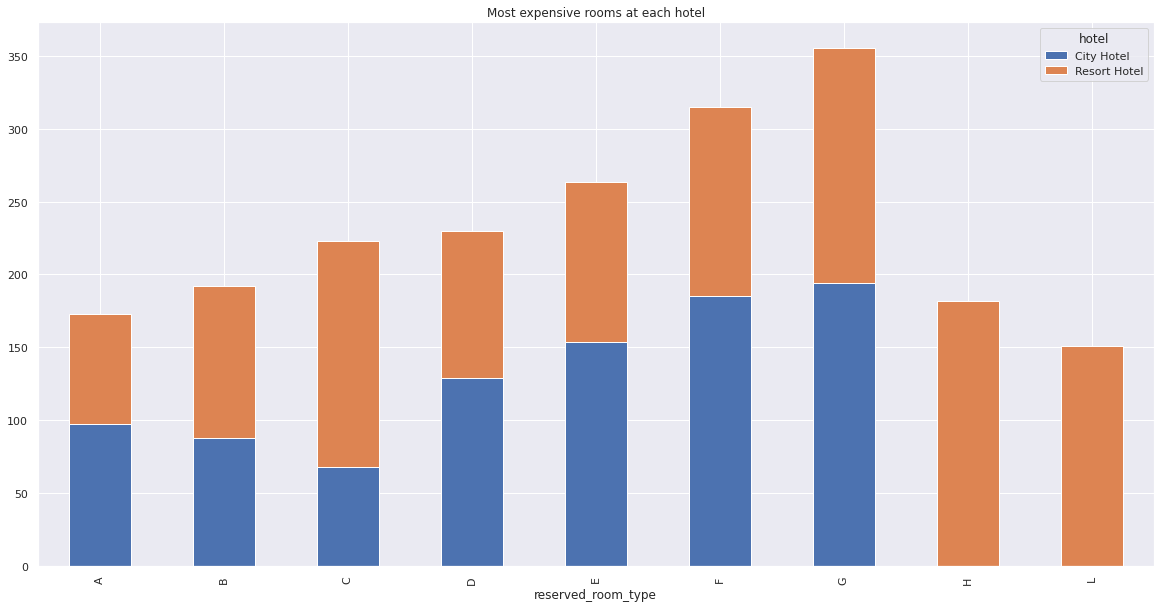

In [219]:
Average_Room_Prices.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title("Most expensive rooms at each hotel")

Insights : Pour l'hôtel de ville (City Hotel ), la chambre « G » est la plus chère en moyenne, tandis que la chambre « H » est la plus chère pour l'hôtel de villégiature (Resort Hotel ).


** Analyse d'annulation **texte en gras**

Quels clients étaient les plus susceptibles d'annuler ; (selon le pays)

In [220]:
#D'abord, je trouve le top 15 des origines des clients les plus fréquents pour rendre les résultats plus utiles aux hôtels. Créez ensuite un nouveau df.
Most_Frequent_Origins = df['country'].value_counts().reset_index()
Most_Frequent_Origins.columns =['Country','Customer_Count']
Most_Frequent_Origins = Most_Frequent_Origins[:15]
Most_Frequent_Origins_List = Most_Frequent_Origins.Country.unique()
Most_Frequent_Origins_DF = df[df['country'].isin(Most_Frequent_Origins_List)]
Most_Frequent_Origins_DF

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_family_size,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,3,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2,7


In [221]:
#Puis je trouve % d'annulations regroupées par pays
Cancellations_By_Country = round(Most_Frequent_Origins_DF.groupby('country')['is_canceled'].value_counts(normalize=True)*100,2).unstack()
Cancellations_By_Country

is_canceled,0,1
country,,
AUT,82.03,17.97
BEL,80.25,19.75
BRA,63.52,36.48
CHE,75.54,24.46
CN,79.41,20.59
DEU,80.45,19.55
ESP,74.32,25.68
FRA,80.39,19.61
GBR,80.97,19.03


Insight :Les clients du Brésil, d'Italie et du Portugal sont les plus susceptibles d'annuler leurs réservations. Alors que les clients d'Autriche, de Belgique, d'Allemagne, de France, des Pays-Bas et du Royaume-Uni sont les moins susceptibles d'annuler.

Quelle station subit le plus d'annulations ?

In [222]:
Resort_Type_Cancellations = round(df.groupby('hotel')['is_canceled'].value_counts(normalize=True)*100,2)
Resort_Type_Cancellations

hotel         is_canceled
City Hotel    0              69.97
              1              30.03
Resort Hotel  0              76.29
              1              23.71
Name: is_canceled, dtype: float64

Insight : les clients qui réservent des séjours dans un hôtel de ville (city hotel ) sont environ 7 % plus susceptibles d'annuler que les clients qui réservent des séjours dans un hôtel de villégiature (resort hotel).


Corr Heatmap

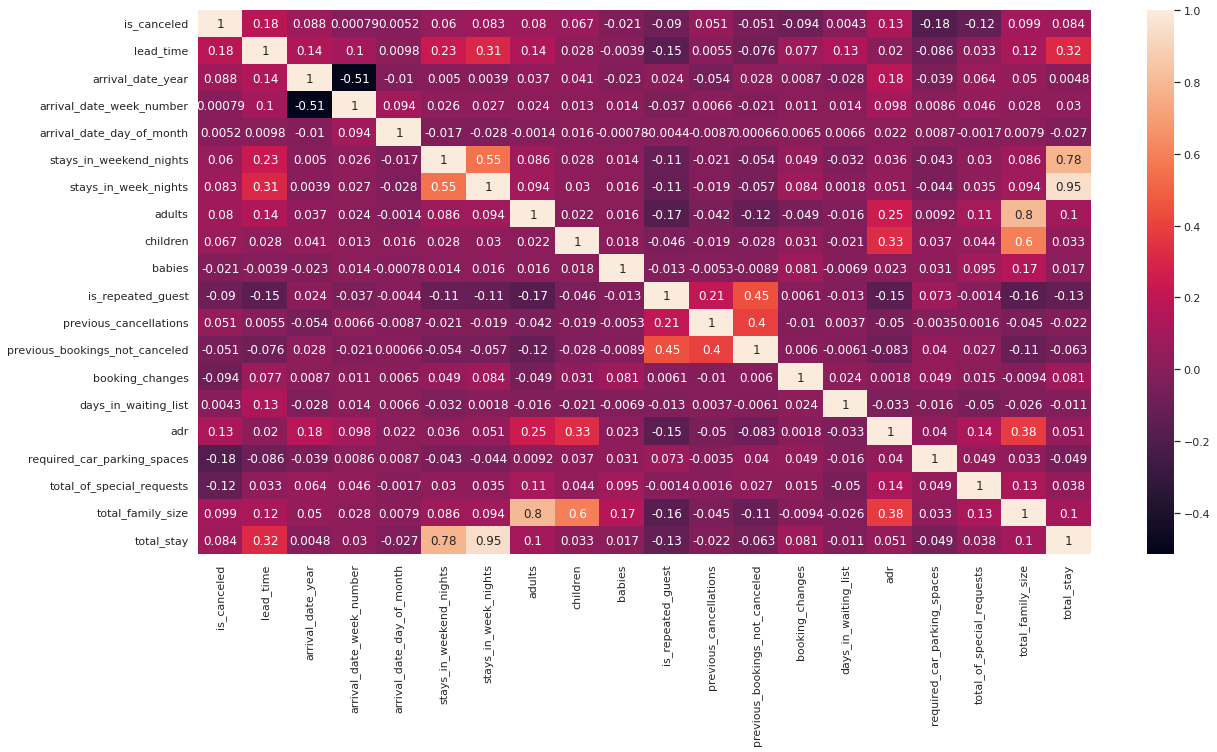

In [223]:
sns.heatmap(df.corr(), annot=True)

Corr de toutes les variables avec '**is_canceled**'

In [224]:
df.corr()['is_canceled'].abs().sort_values(ascending=True)

arrival_date_week_number          0.000795
days_in_waiting_list              0.004297
arrival_date_day_of_month         0.005227
babies                            0.020950
previous_bookings_not_canceled    0.050567
previous_cancellations            0.050964
stays_in_weekend_nights           0.059596
children                          0.067010
adults                            0.080216
stays_in_week_nights              0.082778
total_stay                        0.083866
arrival_date_year                 0.087745
is_repeated_guest                 0.090171
booking_changes                   0.094074
total_family_size                 0.098807
total_of_special_requests         0.121825
adr                               0.126671
lead_time                         0.183683
required_car_parking_spaces       0.183751
is_canceled                       1.000000
Name: is_canceled, dtype: float64

Corr de toutes les variables avec **'adr'**

In [145]:
df.corr()['adr'].abs().sort_values(ascending=True)

booking_changes                   0.001780
lead_time                         0.019698
arrival_date_day_of_month         0.022164
babies                            0.022779
days_in_waiting_list              0.033459
stays_in_weekend_nights           0.035921
required_car_parking_spaces       0.040467
previous_cancellations            0.050240
stays_in_week_nights              0.050859
total_stay                        0.051267
previous_bookings_not_canceled    0.082906
arrival_date_week_number          0.097733
is_canceled                       0.126671
total_of_special_requests         0.136239
is_repeated_guest                 0.154557
arrival_date_year                 0.176021
adults                            0.245238
children                          0.326300
total_family_size                 0.384372
adr                               1.000000
Name: adr, dtype: float64

**Colonne : lead_time**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



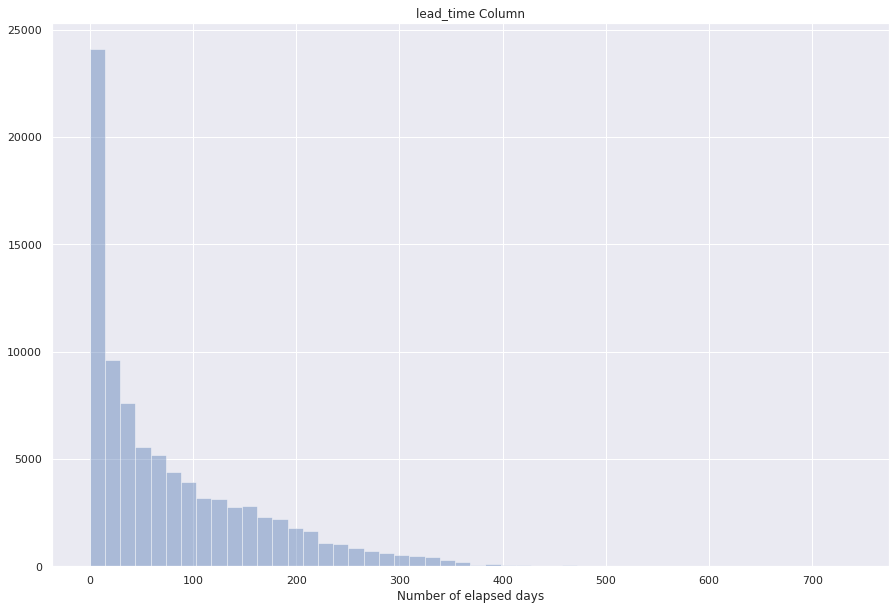

In [225]:
plt.figure(figsize=(15, 10))
plt.title("lead_time Column")
sns.distplot(a=df['lead_time'], kde=False, axlabel="Number of elapsed days")
plt.show()

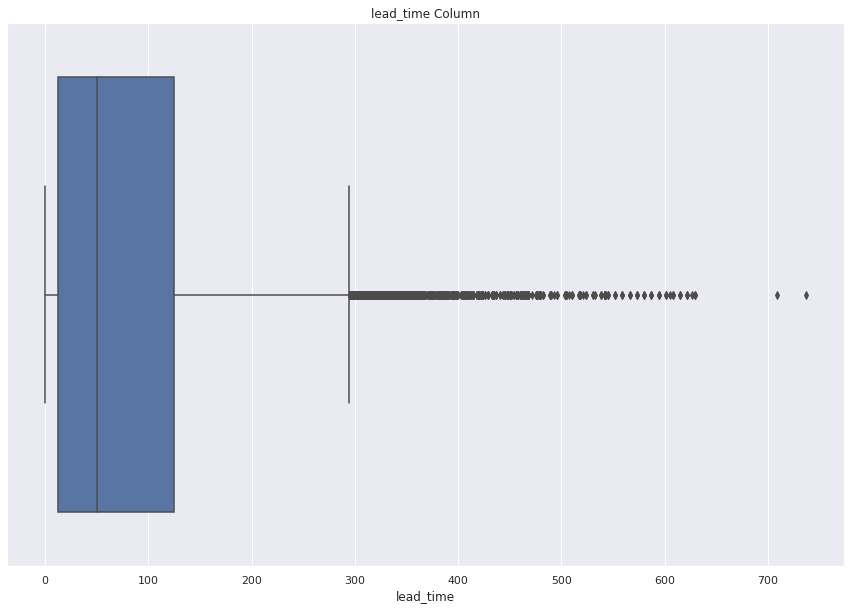

count    86914.000000
mean        80.202741
std         86.102902
min          0.000000
25%         12.000000
50%         50.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64


In [226]:
plt.figure(figsize=(15, 10))
plt.title("lead_time Column")
sns.boxplot(x=df['lead_time'])
plt.show()

print(df['lead_time'].describe())

Insight : Nous voyons donc ici que cette colonne est fortement asymétrique à droite. La plupart des gens ne réservent l'hôtel que quelques jours avant leur départ, mais il y a des gens qui réservent deux ans avant leur arrivée !

**Colonne : Arrival Month**

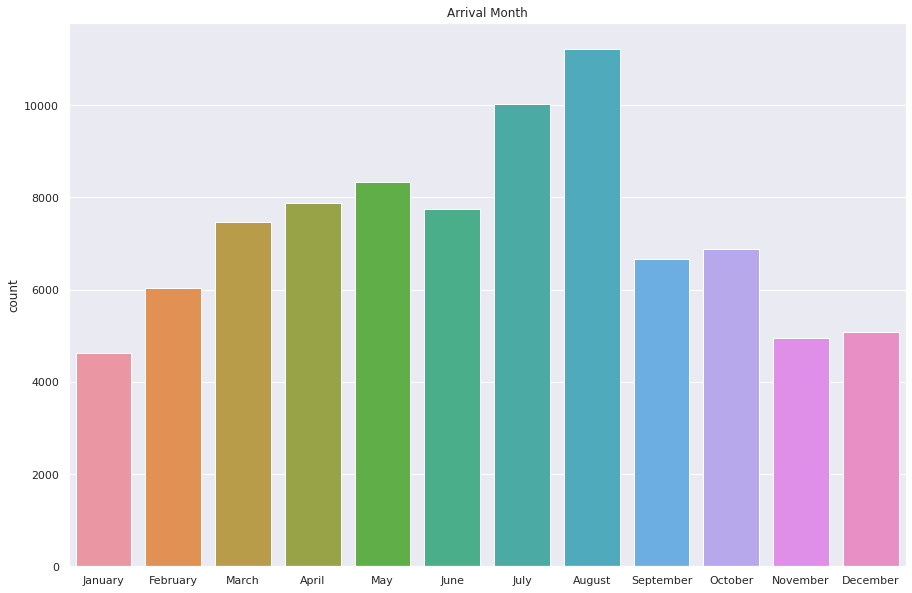

Percentages: 
January       5.334008
February      6.949398
March         8.579745
April         9.053777
May           9.596843
June          8.919161
July         11.528638
August       12.919668
September     7.659295
October       7.919323
November      5.695285
December      5.844858
dtype: float64


In [227]:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

sorted_month = pd.Categorical(df["arrival_date_month"], categories=ordered_months, ordered=True)

plt.figure(figsize=(15, 10))
plt.title("Arrival Month")
sns.countplot(x=sorted_month)
plt.show()

print("Percentages: ")
print(sorted_month.value_counts() / df.shape[0] * 100)

Donc à partir de cette colonne, on voit qu'il y a une légère augmentation des arrivées pendant l'été, ce qui est aussi intuitif car la plupart des familles peuvent voyager ensemble pendant l'été car les enfants sont en vocation.


**Suppression des variables inutiles / Sélection des fonctionnalités et ingénierie**




In [228]:
df.drop(['arrival_date_week_number','days_in_waiting_list', 'arrival_date_year'], axis=1, inplace=True)


In [229]:
df.drop(['arrival_date_month'], axis=1, inplace=True)
df.drop(['arrival_date_day_of_month'], axis=1, inplace=True)
df.drop(['reservation_status'], axis=1, inplace=True)
df.drop(['assigned_room_type'], axis=1, inplace=True)
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'total_family_size', 'total_stay'],
      dtype='object')


In [230]:
#Splitting reservation_status_date pour une manipulation plus facile
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day

In [231]:
df.drop(['reservation_status_date'], axis=1, inplace=True)
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
deposit_type                       object
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
total_family_size                   int64
total_stay                        

In [232]:
# Minimiser le nombre de valeurs uniques dans la colonne de pays, ce qui sera bénéfique lors de la création de dummy vars
df['country'].nunique()
df.loc[~df["country"].isin(top_countries_list), "country"] = "Other"
df['country'].value_counts()
df['country'].nunique()

16

In [233]:
df['deposit_type'].nunique()
df['meal'].nunique()
df['customer_type'].nunique()
df['reserved_room_type'].nunique()

10

Création de Dummy Variables pour Required Variables

In [234]:
df.dtypes


hotel                              object
is_canceled                         int64
lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
deposit_type                       object
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
total_family_size                   int64
total_stay                        

In [235]:
dummies = pd.get_dummies(df, columns=['hotel','meal','country','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type'])
dummies

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,0,0,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,0,0,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,0,2,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2,5,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
119386,0,102,2,5,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
119387,0,34,2,5,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
119388,0,109,2,5,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [236]:
dummies.drop(['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_family_size'], axis=1, inplace=True)


In [237]:
dummies


,is_canceled,is_repeated_guest,year,month,day,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,...,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,2015,7,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,2015,7,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,2015,7,2,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,2015,7,2,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,2015,7,3,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,2017,9,6,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
119386,0,0,2017,9,7,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
119387,0,0,2017,9,7,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
119388,0,0,2017,9,7,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


vérifier la variance des données numériques pour voir si nous devons normaliser les valeurs


In [238]:
df.var().sort_values(ascending=False).head(30)

<ipython-input-238-9db1228fbe55>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



lead_time                         7413.709808
adr                               3020.557642
day                                 77.307364
month                               10.418653
total_stay                           7.553911
stays_in_week_nights                 4.177363
previous_bookings_not_canceled       2.952003
stays_in_weekend_nights              1.058473
total_of_special_requests            0.692024
total_family_size                    0.630246
booking_changes                      0.530242
year                                 0.462696
adults                               0.391727
children                             0.208710
is_canceled                          0.199799
previous_cancellations               0.136626
required_car_parking_spaces          0.078646
is_repeated_guest                    0.037706
babies                               0.012885
dtype: float64

In [239]:
#normalize_columns =['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','required_car_parking_spaces','total_of_special_requests']
normalized_df =df.loc[:, ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','required_car_parking_spaces','total_of_special_requests']] 


Normalisation des colonnes numériques


In [240]:
final_normalized_df= (normalized_df-normalized_df.min())/(normalized_df.max()-normalized_df.min())
final_normalized_df

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
0,0.464043,0.000,0.000000,0.036364,0.0,0.0,0.0,0.0,0.142857,0.001180,0.0,0.0
1,1.000000,0.000,0.000000,0.036364,0.0,0.0,0.0,0.0,0.190476,0.001180,0.0,0.0
2,0.009498,0.000,0.024390,0.018182,0.0,0.0,0.0,0.0,0.000000,0.015053,0.0,0.0
3,0.017639,0.000,0.024390,0.018182,0.0,0.0,0.0,0.0,0.000000,0.015053,0.0,0.0
4,0.018996,0.000,0.048780,0.036364,0.0,0.0,0.0,0.0,0.000000,0.019307,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.031208,0.125,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.018963,0.0,0.0
119386,0.138399,0.125,0.121951,0.054545,0.0,0.0,0.0,0.0,0.000000,0.042877,0.0,0.4
119387,0.046133,0.125,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.030351,0.0,0.8
119388,0.147897,0.125,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.020491,0.0,0.0


In [162]:
Final_df = pd.merge(dummies,final_normalized_df , left_index=True, right_index=True)
Final_df

,is_canceled,is_repeated_guest,year,month,day,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,...,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
0,0,0,2015,7,1,0,1,1,0,0,...,0.000000,0.036364,0.0,0.0,0.0,0.0,0.142857,0.001180,0.0,0.0
1,0,0,2015,7,1,0,1,1,0,0,...,0.000000,0.036364,0.0,0.0,0.0,0.0,0.190476,0.001180,0.0,0.0
2,0,0,2015,7,2,0,1,1,0,0,...,0.024390,0.018182,0.0,0.0,0.0,0.0,0.000000,0.015053,0.0,0.0
3,0,0,2015,7,2,0,1,1,0,0,...,0.024390,0.018182,0.0,0.0,0.0,0.0,0.000000,0.015053,0.0,0.0
4,0,0,2015,7,3,0,1,1,0,0,...,0.048780,0.036364,0.0,0.0,0.0,0.0,0.000000,0.019307,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,2017,9,6,1,0,1,0,0,...,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.018963,0.0,0.0
119386,0,0,2017,9,7,1,0,1,0,0,...,0.121951,0.054545,0.0,0.0,0.0,0.0,0.000000,0.042877,0.0,0.4
119387,0,0,2017,9,7,1,0,1,0,0,...,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.030351,0.0,0.8
119388,0,0,2017,9,7,1,0,1,0,0,...,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.020491,0.0,0.0


**Colonne : stays_in_weekend_nights**


Donc, la plupart des gens ne passent pas la nuit le week-end, mais il y a des gens qui ont vécu à l'hôtel pendant quelques semaines.


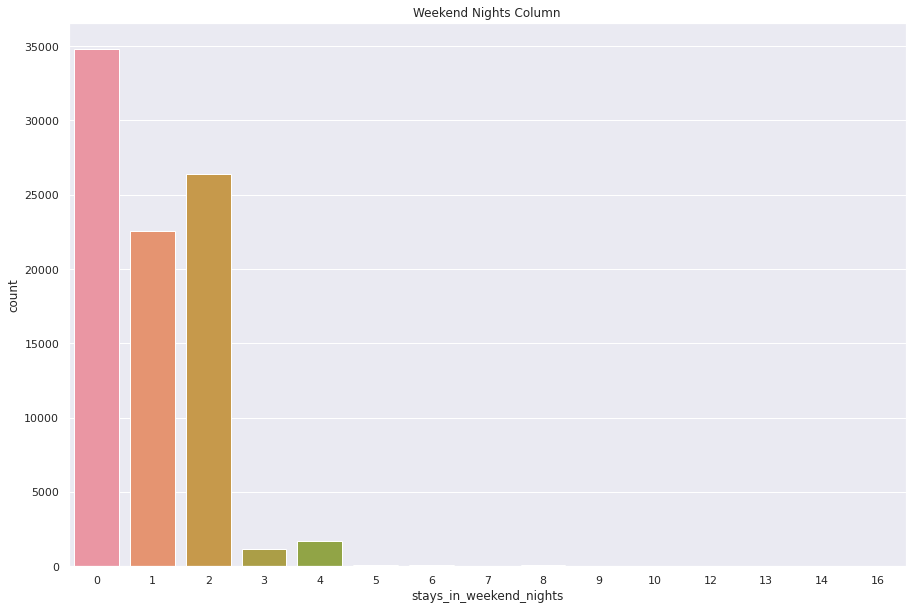

Percentages: 
0     40.084451
2     30.336885
1     25.944037
4      1.988172
3      1.316244
6      0.130014
5      0.079389
8      0.069034
7      0.017258
9      0.011506
10     0.008054
12     0.005753
13     0.003452
16     0.003452
14     0.002301
Name: stays_in_weekend_nights, dtype: float64


In [241]:
plt.figure(figsize=(15, 10))
plt.title("Weekend Nights Column")
sns.countplot(x=df['stays_in_weekend_nights'])
plt.show()

print("Percentages: ")
print(df['stays_in_weekend_nights'].value_counts() / df.shape[0] * 100)

**Colonne : Number of adults**

La plupart des groupes sont donc composés de deux adultes, ce qui est normal. Les clients avec 20 ou 50 adultes sont susceptibles d'être des groupes de touristes


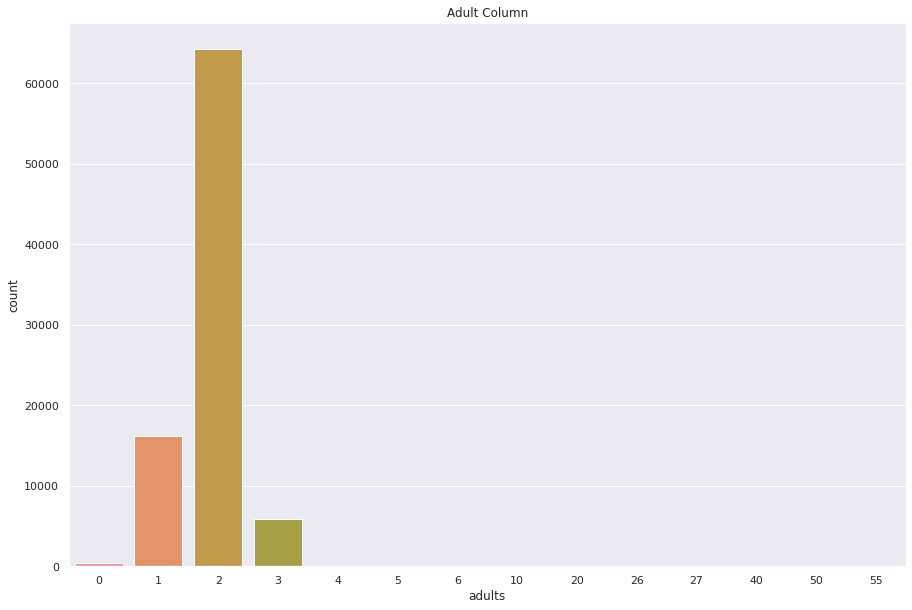

2     74.008790
1     18.643717
3      6.822836
0      0.437214
4      0.069034
26     0.005753
27     0.002301
20     0.002301
5      0.002301
40     0.001151
50     0.001151
55     0.001151
6      0.001151
10     0.001151
Name: adults, dtype: float64


In [168]:
plt.figure(figsize=(15, 10))
plt.title("Adult Column")
sns.countplot(x=df['adults'])
plt.show()

print(df['adults'].value_counts() / df.shape[0] * 100)

**Colonne : Number of Children**

Ainsi, la plupart des clients n'amènent pas d'enfants à l'hôtel.

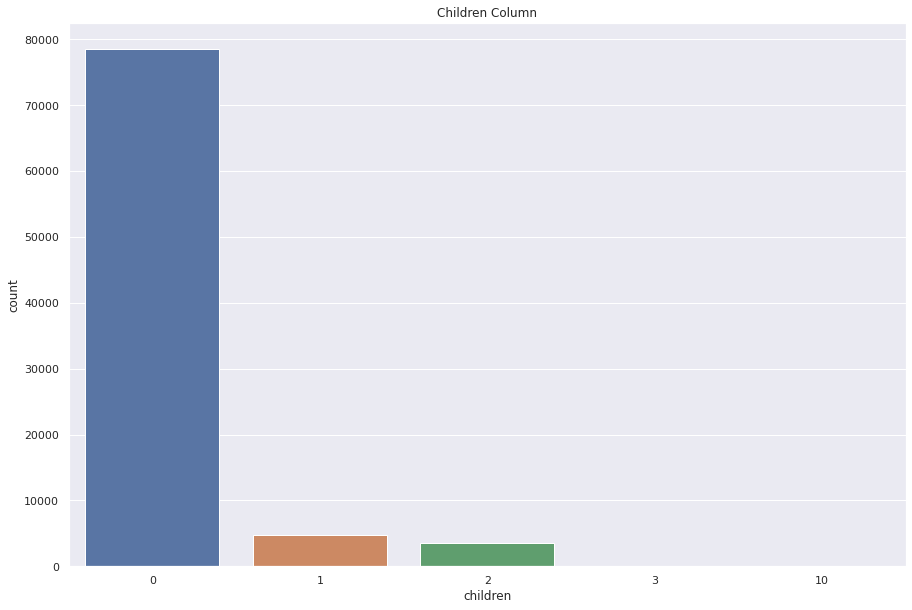

0     90.389350
1      5.391536
2      4.131670
3      0.086292
10     0.001151
Name: children, dtype: float64


In [242]:
plt.figure(figsize=(15, 10))
plt.title("Children Column")
sns.countplot(x=df['children'])
plt.show()

print(df['children'].value_counts() / df.shape[0] * 100)

**Colonne : babies**

Encore une fois, la plupart des clients n'apportent pas de bébés.

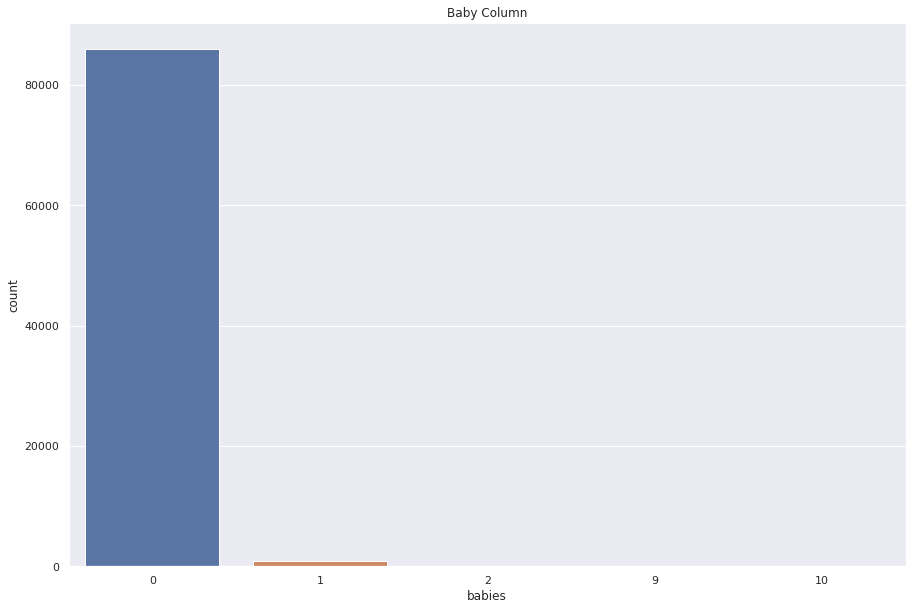

0     98.954139
1      1.027452
2      0.016108
10     0.001151
9      0.001151
Name: babies, dtype: float64


In [243]:
plt.figure(figsize=(15, 10))
plt.title("Baby Column")
sns.countplot(x=df['babies'])
plt.show()

print(df['babies'].value_counts() / df.shape[0] * 100)

**Colonne : Country**

In [244]:
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

visualisation quelques colonnes qui nous intéressent. Ce type d'analyse nous a fourni des informations de base sur les clients, telles que le type d'hôtel qu'ils réservent, d'où ils viennent et généralement combien de personnes voyagent ensemble. Ce sont toutes des informations utiles, mais ce type d'analyse est trop vague et une perte de temps. Je dirais qu'il faut maintenant définir notre question et ensuite voir ce que nous pouvons faire.


**Logistic Regression Model**

In [263]:
#defining independent, dependent data sets
Y = Final_df['is_canceled']
X = Final_df.drop(['is_canceled'], axis=1)

Séparer les données en deux parties 𝟕𝟎%sélectionnées aléatoirement sans répétions pour
l apprentissage 𝑿_𝒕𝒓𝒂𝒊𝒏 𝒀_𝒕𝒓𝒂𝒊𝒏 et les 𝟑𝟎%restantes pour le test 𝑿_𝒕𝒆𝒔𝒕 𝒀_𝒕𝒆𝒔𝒕))(utiliser la
fonction train_test_split de la bibliothèque sklearn model_selection

In [265]:
#creating train/test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3 , random_state=1)


Générer un modèle de prédiction, nommé model, en appliquant la régression logistique
(utiliser la classe LogisticRegression de la bibliothèque sklearn.linear_model sans modifier ses
paramètres ). Déduire l accuracy associé aux données d apprentissage selon df

In [299]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
print (accuracy_score(y_train,model.predict(x_train)))

0.725587205575371


Représenter la matrice de confusion associée aux données de test selon **Model**

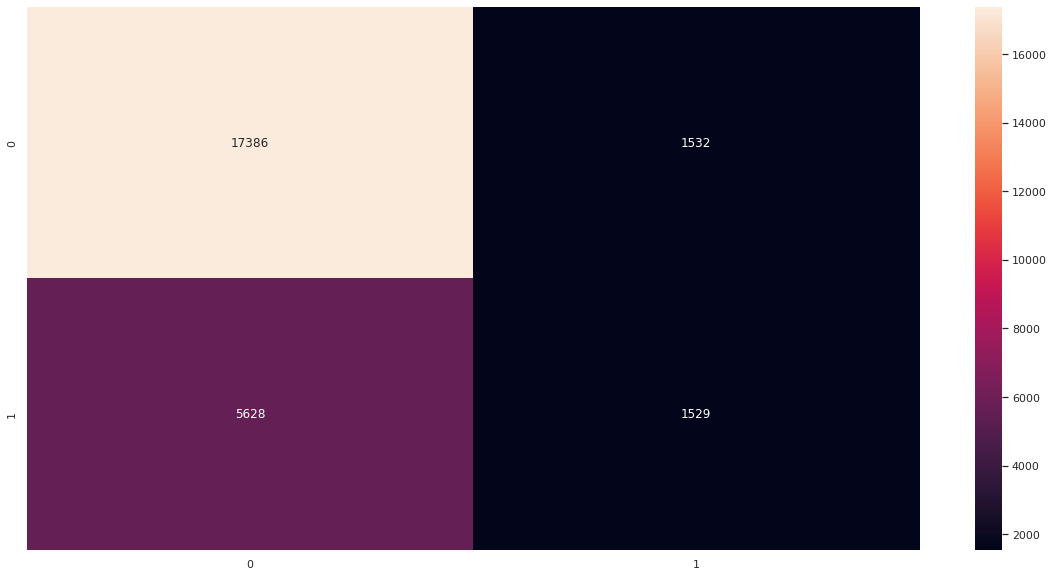

In [300]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
pred_labels=model.predict(x_test)
cm=confusion_matrix(y_test,pred_labels)
sns.heatmap(cm,annot=True,fmt='d')

Déduire le rapport de classification associé aux données d apprentissage selon Model(Utiliser la fonction classification_report de la bibliothèque sklearn.metrics

In [302]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83     18918
           1       0.50      0.21      0.30      7157

    accuracy                           0.73     26075
   macro avg       0.63      0.57      0.56     26075
weighted avg       0.69      0.73      0.68     26075



**Le modèle était précis à 77 % pour prédire si un client annulerait sa réservation.

**Random Forest**


- Le nombre d’arbres est égal à $140$, 
- Le nombre de descripteurs à examiner pour trouver la meilleure répartition est égal à $\sqrt{Nombre\_total\_descripteurs}$
- Le nombre d’observations à tirer aléatoirement avec remise de la base d’apprentissage lors la construction de chaque arbre (In-Bag) est égale à $63\%$. 

Puis, déduire le taux d'erreur du model sur les données Out-Of-Bag

In [267]:
from sklearn.ensemble import RandomForestClassifier
cls_perf1 = RandomForestClassifier(n_estimators=140,max_features='sqrt', bootstrap=True,max_samples=0.63, oob_score=True) 
cls_perf1.fit(x_train,y_train) 

print(cls_perf1.oob_score_) 

0.8677986160193297


**Regression Linéaire**

In [311]:
from sklearn.linear_model import LinearRegression


In [312]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [313]:
y_pred = lr.predict(x_test)
y_pred

array([0.52375441, 0.49326122, 0.24704198, ..., 0.48799264, 0.39251091,
       0.35101343])

Si je suis directeur d'hôtel, je serai très intéressé de savoir si un client annulera sa réservation d'hôtel, car cela est profondément corrélé aux revenus que notre hôtel peut gagner. Par conséquent, essayons de construire un modèle pour prédire si quelqu'un annulera sa réservation d'hôtel à partir d'autres paramètres.

**Corrélations d'annulation**

Maintenant que nous avons défini le problème, voyons d'abord quelles colonnes sont fortement associées à la colonne is_cancelled


In [317]:
cancel_corr = df.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

Il est ainsi montré que ***lead_time***, **total_of_special_requests**, **required_car_parking_spaces**, **booking_changes** et **previous_cancellations** sont les 5 variables numériques les plus corrélées avec la colonne **is_cancelled**. Mais pour éviter d'éventuelles fuites de données, nous devons exclure **booking_changes**, qui peut inclure l'annulation d'une réservation d'hôtel. En outre, **reservation_status** indique également si un client annule ou non la réservation. Il doit donc également être exclu pour éviter les fuites de données.

Examinons maintenant les **categorical features.**


**Hotel**

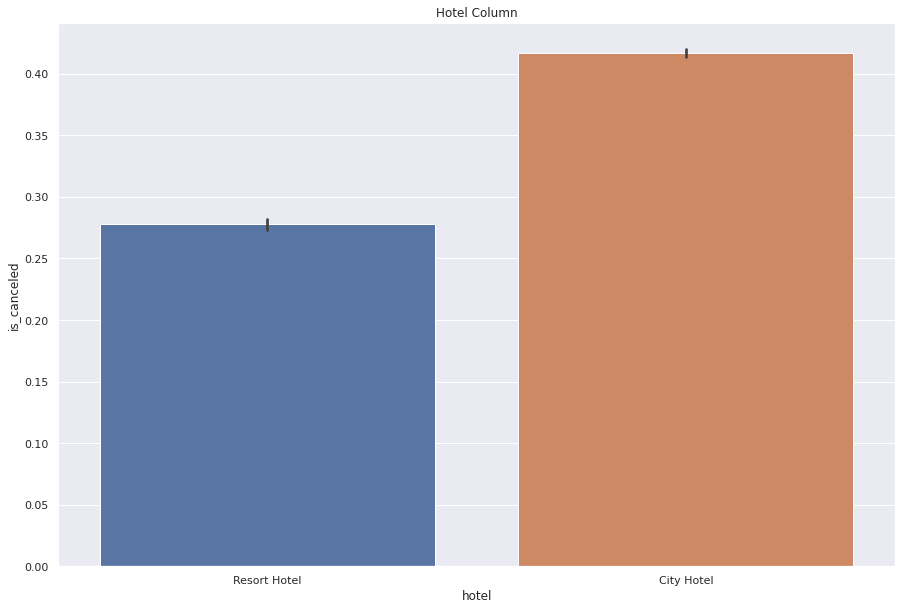

In [319]:
plt.figure(figsize=(15, 10))
plt.title("Hotel Column")
sns.barplot(x=df['hotel'], y=df['is_canceled'])
plt.show()

Le type d'hôtel semble affecter si un client annule la réservation.


**Colonne : Meal (Repas)**

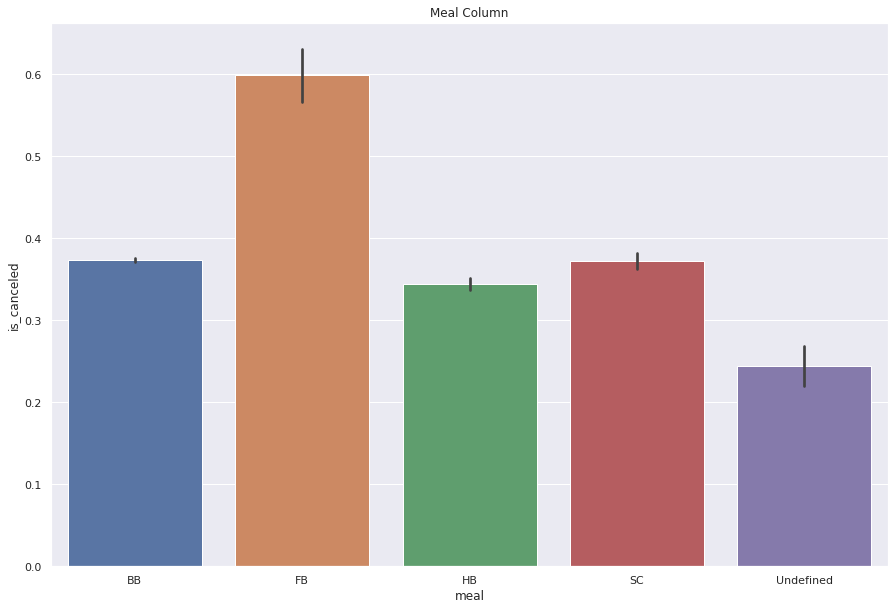

In [320]:
plt.figure(figsize=(15, 10))
plt.title("Meal Column")
sns.barplot(x=df['meal'], y=df['is_canceled'])
plt.show()

Le repas semble également affecter les chances d'annulation. Plus précisément, les clients qui ont commandé la pension complète sont plus susceptibles d'annuler les réservations.


**Colonne : Market Segment (Segment de marché)**









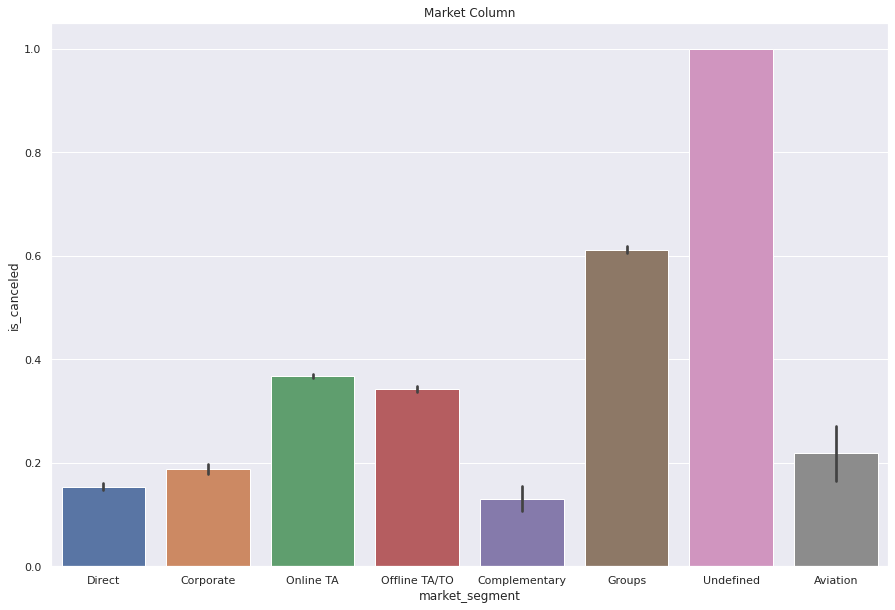

In [321]:
plt.figure(figsize=(15, 10))
plt.title("Market Column")
sns.barplot(x=df['market_segment'], y=df['is_canceled'])
plt.show()

Cette colonne semble également affecter l'annulation de la réservation.


**Model Selection**

Avant de procéder à une analyse plus approfondie, sélectionnons un modèle d'apprentissage automatique à utiliser pour notre prédiction. Dans cette section, je vais créer plusieurs modèles simples et voir lequel a les meilleures performances.


In [330]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","assigned_room_type", "deposit_type","customer_type"]


features = num_features + cat_features
X = df.drop(["is_canceled"], axis=1)[features]
y = df["is_canceled"]

num_transformer = SimpleImputer(strategy="constant")

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

In [332]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1)),
               ("Ada_model", AdaBoostClassifier(random_state=42)),
               ("KNN_model", KNeighborsClassifier(n_jobs=-1))]

kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
for name, model in base_models:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

DT_model cross validation accuarcy score: 0.8266 +/- 0.0013 (std) min: 0.8247, max: 0.8279
RF_model cross validation accuarcy score: 0.8696 +/- 0.0011 (std) min: 0.8678, max: 0.8703
LR_model cross validation accuarcy score: 0.7981 +/- 0.0013 (std) min: 0.7961, max: 0.7996
XGB_model cross validation accuarcy score: 0.8184 +/- 0.0008 (std) min: 0.8171, max: 0.8194
Ada_model cross validation accuarcy score: 0.8178 +/- 0.0009 (std) min: 0.8165, max: 0.8188
KNN_model cross validation accuarcy score: 0.774 +/- 0.0017 (std) min: 0.7719, max: 0.7765


Nous voyons que **random forest classifier** a eu les meilleures performances (86,664%). Par conséquent, nous utiliserons ce modèle pour des prédictions ultérieures.

**Plus d'analyse bivariée**

Colonne : **required_car_parking_spaces**



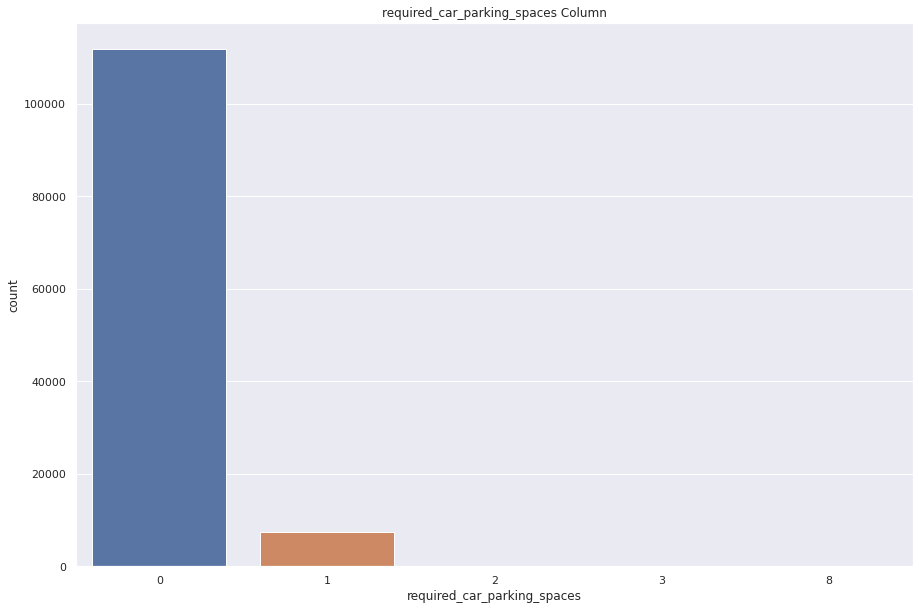

0    93.788424
1     6.183935
2     0.023453
3     0.002513
8     0.001675
Name: required_car_parking_spaces, dtype: float64


In [333]:
plt.figure(figsize=(15, 10))
plt.title("required_car_parking_spaces Column")
sns.countplot(x=df['required_car_parking_spaces'])
plt.show()

print(df['required_car_parking_spaces'].value_counts() / df.shape[0] * 100)

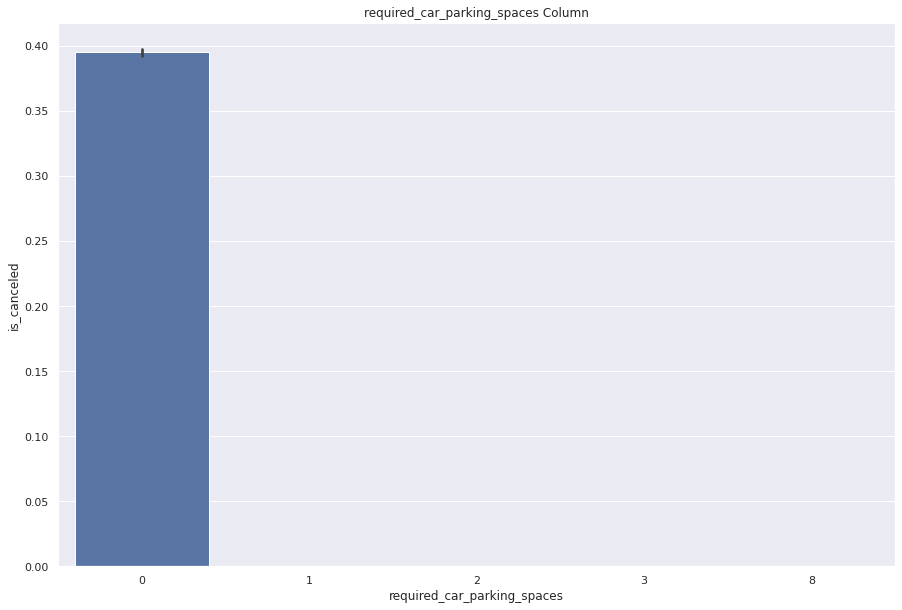

   required_car_parking_spaces  is_canceled
0                            0     0.394949
1                            1     0.000000
2                            2     0.000000
3                            3     0.000000
4                            8     0.000000


In [335]:
plt.figure(figsize=(15, 10))
plt.title("required_car_parking_spaces Column")
sns.barplot(x=df['required_car_parking_spaces'], y=df['is_canceled'])
plt.show()

print( df[["required_car_parking_spaces","is_canceled"]].groupby(["required_car_parking_spaces"], as_index = False).mean() )

Nous voyons donc que si le client a besoin d'au moins une place de parking, la possibilité d'annuler la réservation est très faible. Je dis que nous pouvons en fait modifier cette colonne pour indiquer uniquement si un client fait une exigence (notée 1) ou non (notée 0), ce qui est peut-être plus simple pour notre modèle ?

In [337]:
df.loc[df['required_car_parking_spaces'] != 0, 'required_car_parking_spaces'] = 1

Après le changement :


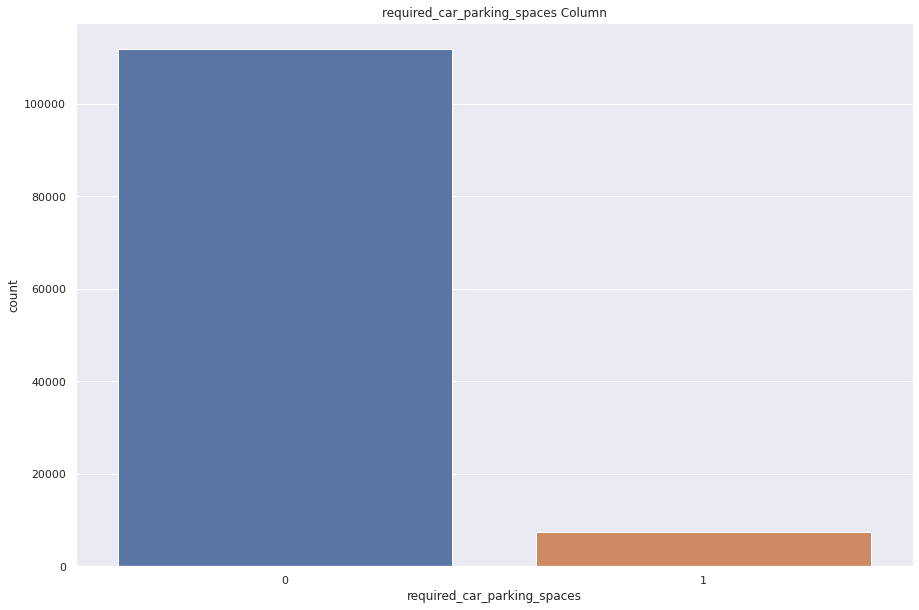

0    93.788424
1     6.211576
Name: required_car_parking_spaces, dtype: float64


In [338]:
plt.figure(figsize=(15, 10))
plt.title("required_car_parking_spaces Column")
sns.countplot(x=df['required_car_parking_spaces'])
plt.show()

print(df['required_car_parking_spaces'].value_counts() / df.shape[0] * 100)

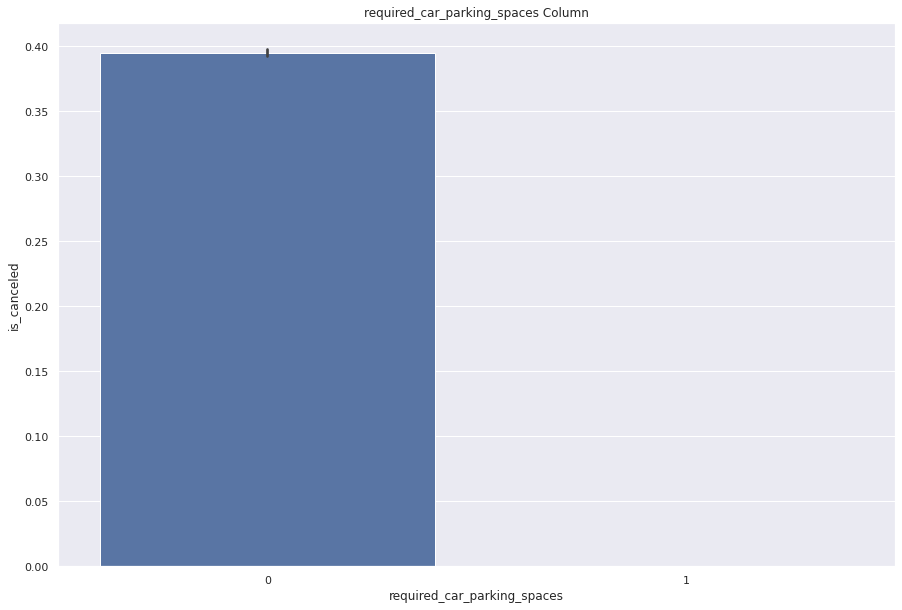

   required_car_parking_spaces  is_canceled
0                            0     0.394949
1                            1     0.000000


In [339]:
plt.figure(figsize=(15, 10))
plt.title("required_car_parking_spaces Column")
sns.barplot(x=df['required_car_parking_spaces'], y=df['is_canceled'])
plt.show()

print( df[["required_car_parking_spaces","is_canceled"]].groupby(["required_car_parking_spaces"], as_index = False).mean() )

Voyons si cela ferait une différence dans le score de prédiction de notre modèle.


In [340]:
X = df.drop(["is_canceled"], axis=1)[features]
y = df["is_canceled"]

model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=42,n_jobs=-1))])
    
cv_results = cross_val_score(model_steps, 
                             X, y, 
                             cv=split,
                             scoring="accuracy",
                             n_jobs=-1)

min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"RF Model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

RF Model cross validation accuarcy score: 0.8696 +/- 0.0011 (std) min: 0.8678, max: 0.8703


Excellent! Nous constatons une amélioration de la précision, ce qui signifie que cette modification fonctionne réellement !

**Colonne : previous_cancellations (annulations_précédentes
)**


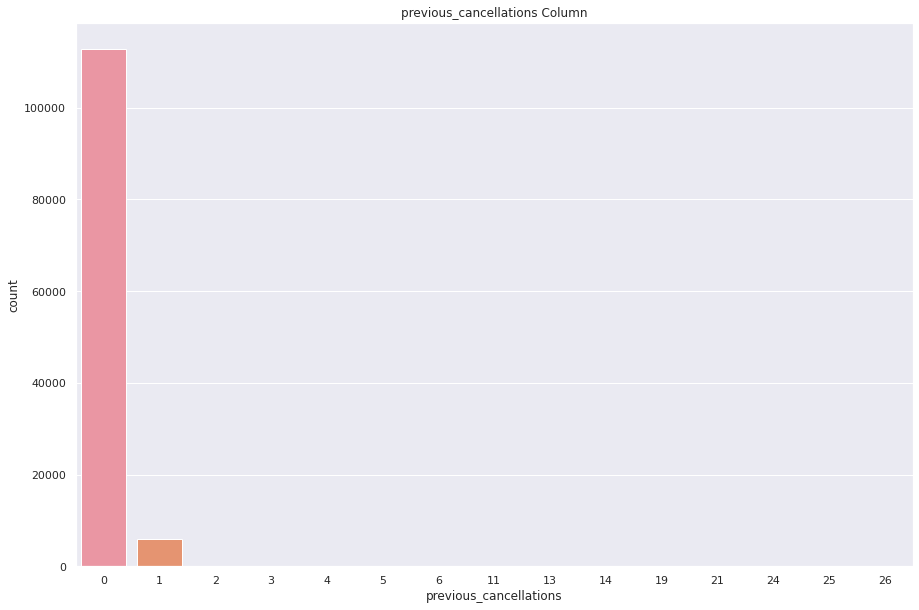

0     94.569059
1      5.068264
2      0.097161
3      0.054443
24     0.040204
11     0.029316
4      0.025965
26     0.021777
25     0.020940
6      0.018427
19     0.015914
5      0.015914
14     0.011726
13     0.010051
21     0.000838
Name: previous_cancellations, dtype: float64


In [341]:
plt.figure(figsize=(15, 10))
plt.title("previous_cancellations Column")
sns.countplot(x=df['previous_cancellations'])
plt.show()

print(df['previous_cancellations'].value_counts() / df.shape[0] * 100)

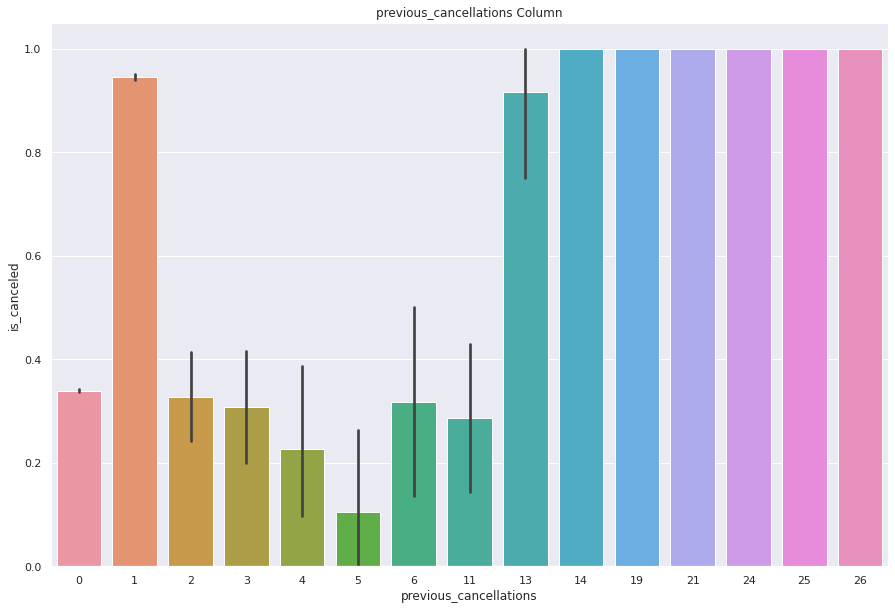

    previous_cancellations  is_canceled
0                        0     0.339061
1                        1     0.944307
2                        2     0.327586
3                        3     0.307692
4                        4     0.225806
5                        5     0.105263
6                        6     0.318182
7                       11     0.285714
8                       13     0.916667
9                       14     1.000000
10                      19     1.000000
11                      21     1.000000
12                      24     1.000000
13                      25     1.000000
14                      26     1.000000


In [342]:

plt.figure(figsize=(15, 10))
plt.title("previous_cancellations Column")
sns.barplot(x=df['previous_cancellations'], y=df['is_canceled'])
plt.show()

print( df[["previous_cancellations","is_canceled"]].groupby(["previous_cancellations"], as_index = False).mean() )

Nous voyons donc que si le nombre de previous_cancellations est de 1 ou supérieur à 12, les chances d'annuler la réservation sont très élevées. Cela me fait me demander si la prédiction sera meilleure si j'applique la même modification que l'espace de stationnement. Découvrons-le


In [343]:
temp_previous_cancel = df['previous_cancellations'].copy()

In [344]:
df.loc[(df['previous_cancellations'] == 1) | (df['previous_cancellations'] >= 13), 'previous_cancellations'] = 1
df.loc[(df['previous_cancellations'] != 1) & (df['previous_cancellations'] < 13), 'previous_cancellations'] = 0

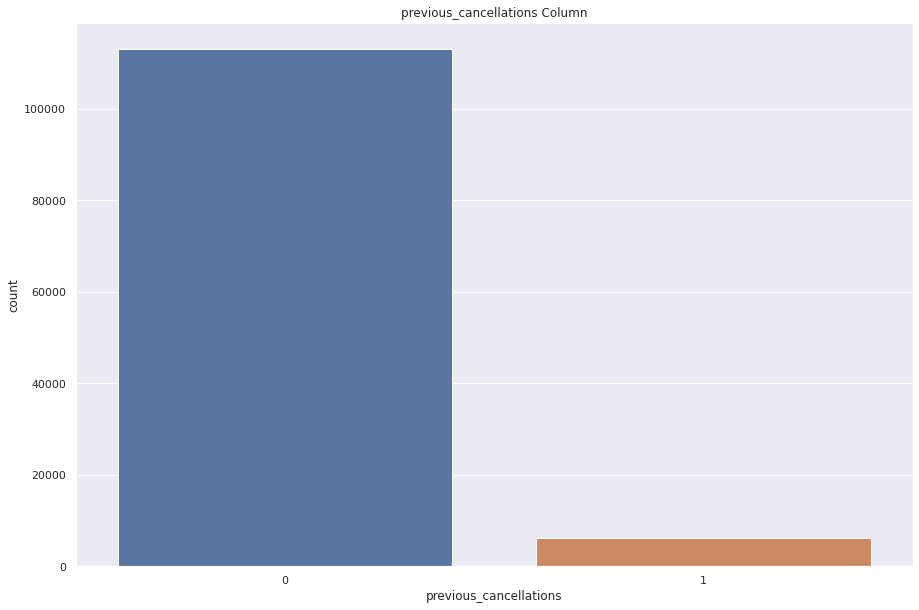

0    94.810286
1     5.189714
Name: previous_cancellations, dtype: float64


In [345]:
plt.figure(figsize=(15, 10))
plt.title("previous_cancellations Column")
sns.countplot(x=df['previous_cancellations'])
plt.show()

print(df['previous_cancellations'].value_counts() / df.shape[0] * 100)

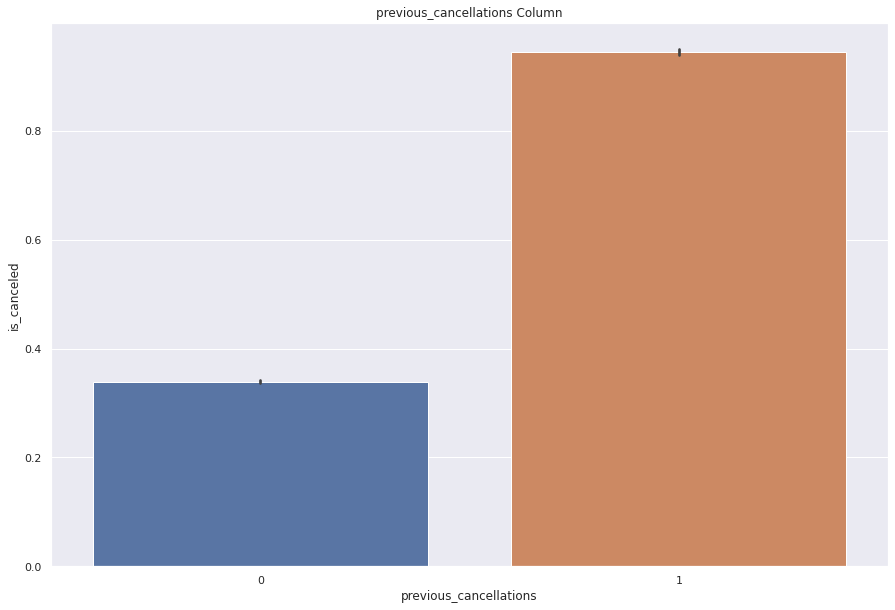

   previous_cancellations  is_canceled
0                       0     0.338940
1                       1     0.945449


In [347]:
plt.figure(figsize=(15, 10))
plt.title("previous_cancellations Column")
sns.barplot(x=df['previous_cancellations'], y=df['is_canceled'])
plt.show()

print( df[["previous_cancellations","is_canceled"]].groupby(["previous_cancellations"], as_index = False).mean() )

Maintenant, les performances de notre modèle sont :


In [348]:
X = df.drop(["is_canceled"], axis=1)[features]
y = df["is_canceled"]

model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=42,n_jobs=-1))])
    
cv_results = cross_val_score(model_steps, 
                             X, y, 
                             cv=split,
                             scoring="accuracy",
                             n_jobs=-1)

min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"RF Model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

RF Model cross validation accuarcy score: 0.8694 +/- 0.0013 (std) min: 0.8682, max: 0.8711


Malheureusement, cela aggrave les performances, alors annulons ce changement.


In [349]:
df['previous_cancellations'] = temp_previous_cancel

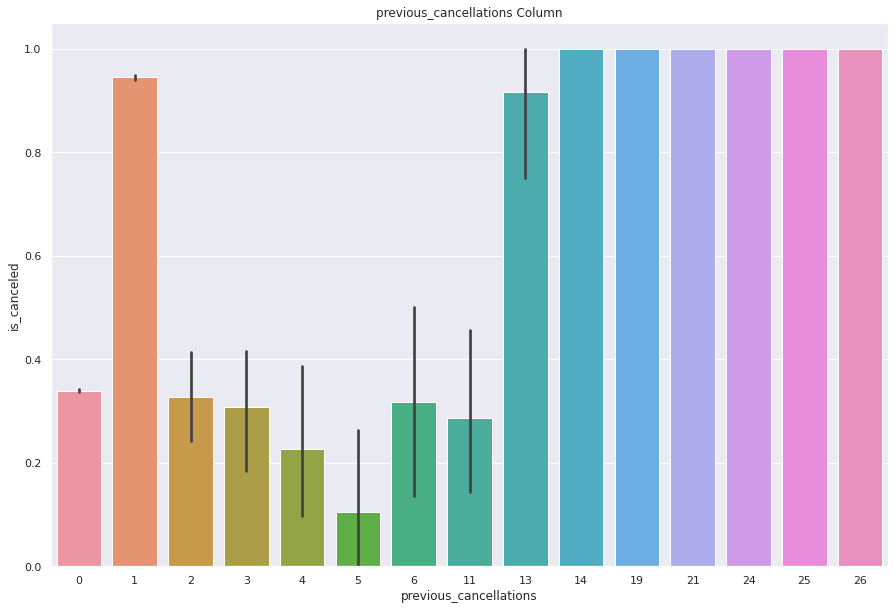

    previous_cancellations  is_canceled
0                        0     0.339061
1                        1     0.944307
2                        2     0.327586
3                        3     0.307692
4                        4     0.225806
5                        5     0.105263
6                        6     0.318182
7                       11     0.285714
8                       13     0.916667
9                       14     1.000000
10                      19     1.000000
11                      21     1.000000
12                      24     1.000000
13                      25     1.000000
14                      26     1.000000


In [350]:
plt.figure(figsize=(15, 10))
plt.title("previous_cancellations Column")
sns.barplot(x=df['previous_cancellations'], y=df['is_canceled'])
plt.show()

print( df[["previous_cancellations","is_canceled"]].groupby(["previous_cancellations"], as_index = False).mean() )

In [351]:
X = df.drop(["is_canceled"], axis=1)[features]
y = df["is_canceled"]

model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=42,n_jobs=-1))])
    
cv_results = cross_val_score(model_steps, 
                             X, y, 
                             cv=split,
                             scoring="accuracy",
                             n_jobs=-1)

min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"RF Model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

RF Model cross validation accuarcy score: 0.8696 +/- 0.0011 (std) min: 0.8678, max: 0.8703


**Réglage final**

Maintenant, nous avons fait toutes les modifications. Ajustons enfin les hyperparamètres et faisons les prédictions finales.


In [352]:
rf_model_enh = RandomForestClassifier(n_estimators=160,
                               max_features=0.4,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)

split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model_enh)])
cv_results = cross_val_score(model_pipe, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
# output:
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"Enhanced RF model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

Enhanced RF model cross validation accuarcy score: 0.8712 +/- 0.0019 (std) min: 0.8689, max: 0.8742


**Notre précision de prédiction finale est donc de 87,12 %.**
